# <center>Data Analysis 3 - Assignment 1<center>
    
<center>Created by Zsófia Rebeka Katona</center>


Build four predictive models using linear regression for earnings per hour.
1. Models: the target variable is earnings per hour, all others would be predictors

In [1]:
# Importing the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

In [2]:
# Importing the prewritten helper functions
from py_helper_functions import *

In [3]:
# Reading the data
data = pd.read_csv("morg-2014-emp.csv")

# Checking if the data was correctly loaded
data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

### Exploratory Data Analysis

In [5]:
data.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [6]:
# Filtering for Human resource managers (0136) and Human resource workers (630)
data = data[data['occ2012'].isin([136, 630])]
data

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
271,598,992279930309004,January,AK,360.3615,923.00,40,43,1,NaN,...,1,4,"Native, Born In US",94,Support activities for mining (213),136,"Private, For Profit",No,No,Employed-At Work
545,1236,5017808077661,January,CA,3452.5706,1615.38,40,39,1,NaN,...,1,3,"Native, Born In US",93,Executive offices and legislative bodies (9211...,630,Government - Federal,No,No,Employed-At Work
601,1351,65520360020508,January,CA,3457.9806,807.69,40,44,1,1.0,...,0,0,"Native, Born In US",93,"Museums, art galleries, historical sites, and ...",136,"Private, Nonprofit",No,No,Employed-At Work
695,1569,256080630550002,January,CA,2889.1284,807.00,40,44,1,7.0,...,0,0,"Native, Born In US",93,"Museums, art galleries, historical sites, and ...",136,"Private, Nonprofit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148598,315498,58305630783096,December,WA,3039.5721,600.00,37,39,1,1.0,...,0,0,"Native, Born In US",9,"Other amusement, gambling, and recreation indu...",630,"Private, For Profit",No,No,Employed-At Work
148774,315915,108415040044617,December,WV,673.5209,668.42,38,43,1,NaN,...,0,0,"Native, Born In US",5,Outpatient care centers (6214),136,"Private, For Profit",No,No,Employed-At Work
148827,316049,505181410066,December,WV,539.8396,115.38,50,44,1,NaN,...,0,0,"Native, Born In US",5,"Other schools, instruction, and educational se...",630,"Private, Nonprofit",No,No,Employed-Absent
148943,316329,102506390510951,December,WI,3529.8688,692.40,40,43,1,NaN,...,0,0,"Native, Born In US",3,Computer systems design and related services (...,630,"Private, For Profit",No,No,Employed-At Work


### Creating variables:
- earnings per hour
- log earnings per hour
- female as a dummy variable
- age
- age squared
- level of education

In [7]:
# Creating new variable: earnings per hour
data["earnphour"] = data["earnwke"] / data["uhours"]
data["lnearnphour"] = np.log(data["earnphour"])
data["female"] = (data["sex"] == 2)
data["agesq"] = np.power(data["age"], 2)
data["edu"] = data["grade92"]

In [8]:
# Grouping educational levels and creating dummies
# 'hsedu' referring to high school education
# "higheredu" referring to higher education, including Bachelors, Masters, PhD and Professional degrees
data["hsedu"] = (data["grade92"] == 39).astype(int)
data["higheredu"] = (data["grade92"].isin([40, 41 ,42 , 43, 44, 45, 46]).astype(int))

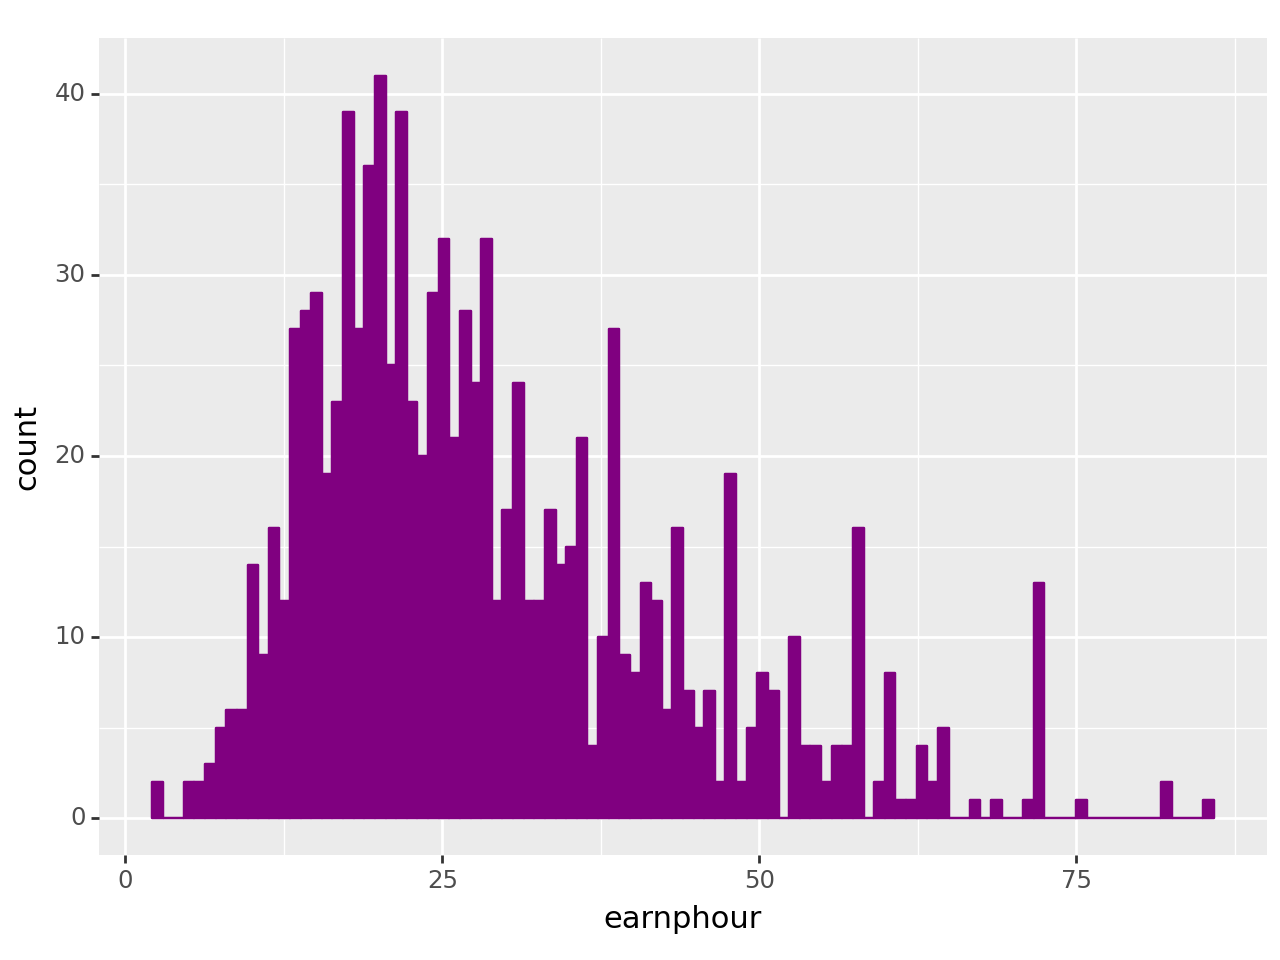

<Figure Size: (640 x 480)>

In [9]:
# Checking for the quality of the distribution and sufficient variation
ggplot(data, aes(x='earnphour')) + geom_histogram(fill='purple', color='purple', bins=100)

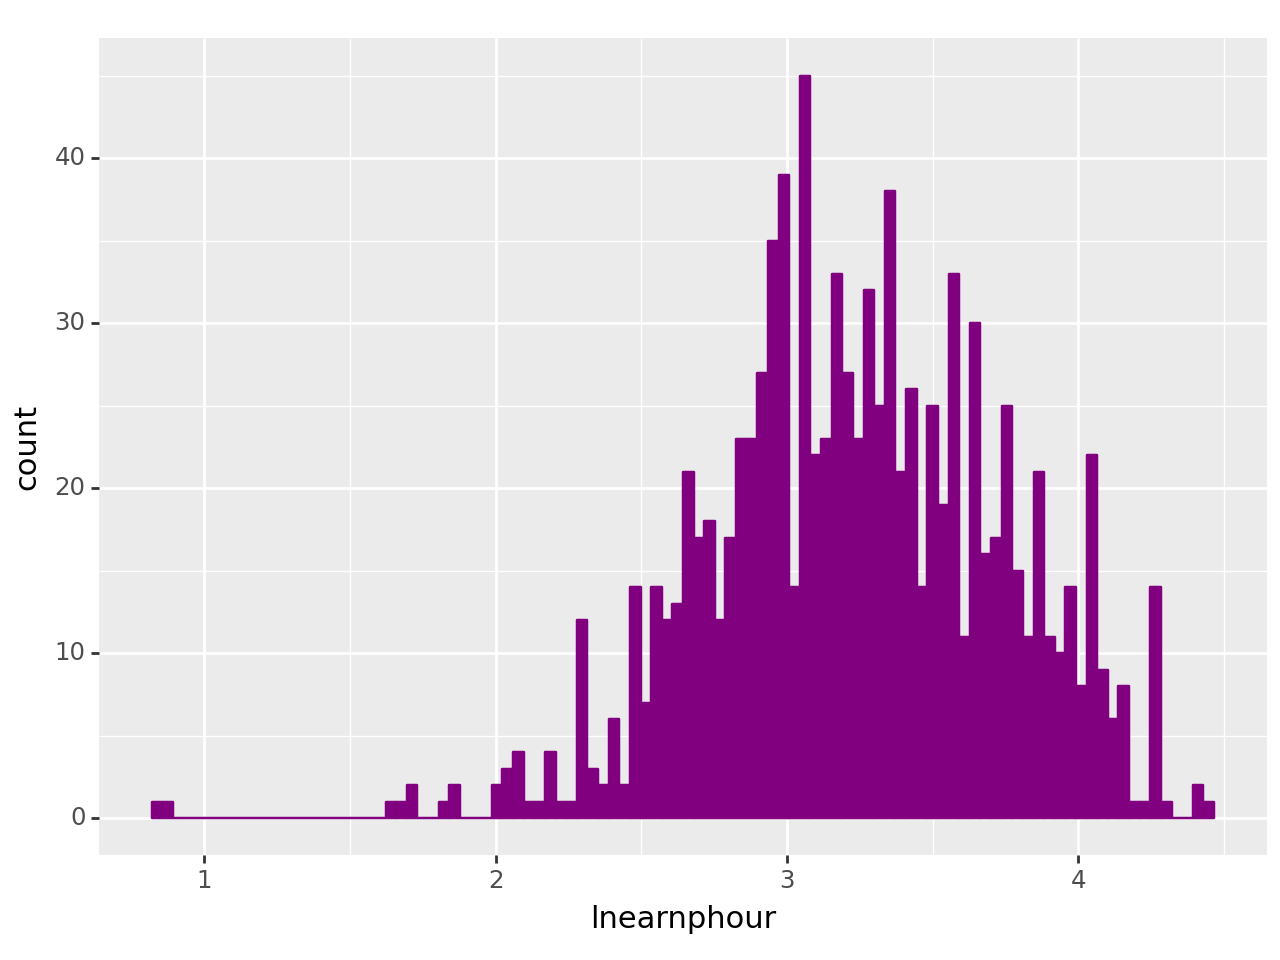

<Figure Size: (640 x 480)>

In [10]:
# Checking the log earnings per hour distribution
ggplot(data, aes(x='lnearnphour')) + geom_histogram(fill='purple', color='purple', bins=100)

In [11]:
# Checking if we have 0 or missing values
data.sort_values(by = 'earnphour')

# There are no values = 0

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,unionmme,unioncov,lfsr94,earnphour,lnearnphour,female,agesq,edu,hsedu,higheredu
148827,316049,505181410066,December,WV,539.8396,115.38,50,44,1,NaN,...,No,No,Employed-Absent,2.307600,0.836208,False,3364,44,0,1
4714,10248,202033508042251,January,LA,3390.3011,96.15,40,44,1,NaN,...,No,No,Employed-At Work,2.403750,0.877030,False,900,44,0,1
36996,78975,126068879100966,April,AL,3400.8182,230.00,45,39,1,NaN,...,No,No,Employed-At Work,5.111111,1.631417,True,2601,39,1,0
89718,190683,502906731999943,August,GA,2870.6039,213.69,40,43,1,1.0,...,No,No,Employed-At Work,5.342250,1.675647,True,1521,43,0,1
31302,66879,803016065908994,March,MT,1024.6256,83.07,15,40,1,NaN,...,No,No,Employed-At Work,5.538000,1.711633,False,441,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144685,307293,196090160000301,December,NY,3191.0810,2884.61,40,44,1,NaN,...,No,No,Employed-At Work,72.115250,4.278266,True,3721,44,0,1
133206,282636,43059686300841,November,OH,2733.3221,1200.00,16,43,1,NaN,...,No,No,Employed-At Work,75.000000,4.317488,True,3969,43,0,1
56830,121226,396947702067673,May,NY,2759.8090,2884.61,35,44,2,NaN,...,No,No,Employed-At Work,82.417429,4.411797,True,1369,44,0,1
30576,65402,450974079025329,March,MN,1767.7635,2307.69,28,45,1,NaN,...,No,No,Employed-At Work,82.417500,4.411798,True,2809,45,0,1


In [12]:
# Checking for NaN in the 'earnwke' column
data.loc[data["earnphour"].isna()]

# There are no missing values

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,unionmme,unioncov,lfsr94,earnphour,lnearnphour,female,agesq,edu,hsedu,higheredu


#### Model 1. - Regression of earnings per hour on age

In [60]:
# Creating the regression and checking the summary of regression
reg1 = smf.ols(formula="earnphour~age", data=data).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              earnphour   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.73e-15
Time:                        09:27:53   Log-Likelihood:                -4123.8
No. Observations:                1017   AIC:                             8252.
Df Residuals:                    1015   BIC:                             8261.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2514      1.508     10.777      0.000      13.296      19.207
age            0.2989      0.037      8.087      0.000       0.226       0.371
==============================================================================
Omnibus:                      130.536   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.444
Skew:                           0.970   Prob(JB):                     3.98e-40
Kurtosis:                       3.721   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

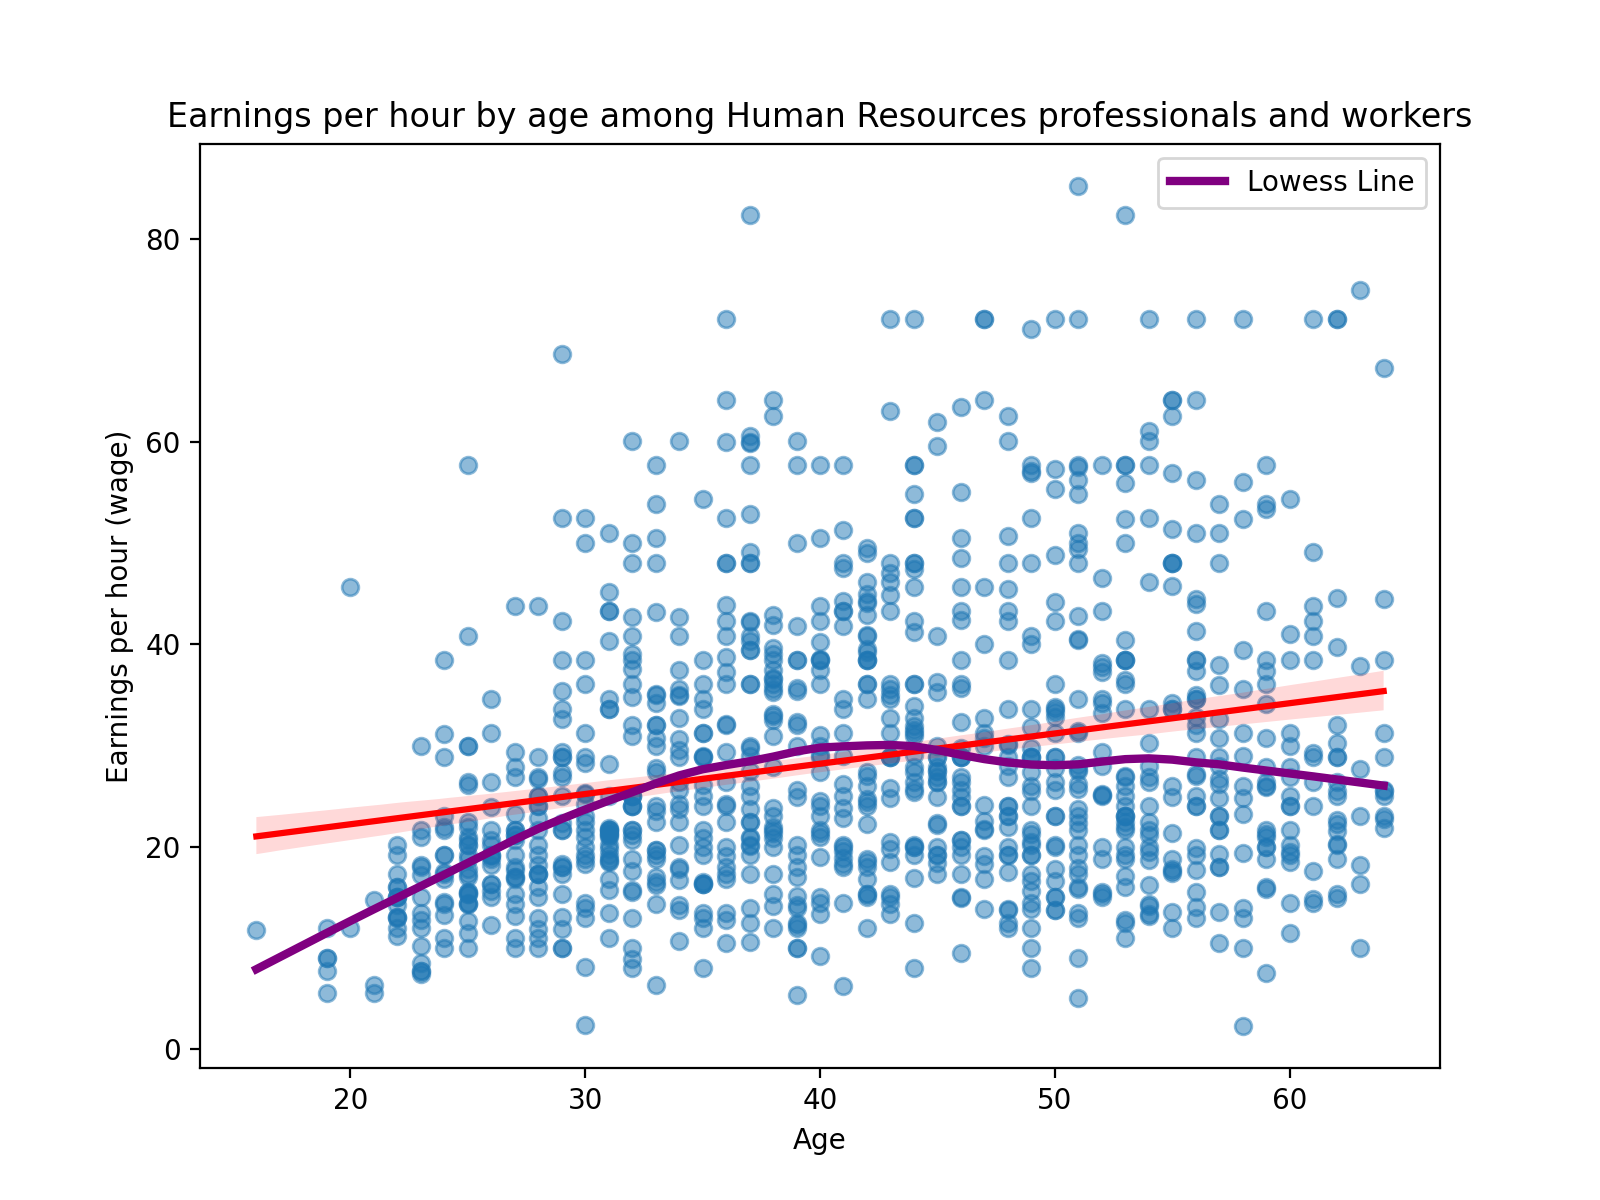

In [109]:
# Creating the scatter plot with the regression line (model 1)
plt.figure(figsize=(8, 6))
sns.regplot(x=data['age'], y=data['earnphour'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Calculating lowess values
lowess = sm.nonparametric.lowess(data['earnphour'], data['age'], frac=0.3)

# Plotting the lowess line
plt.plot(lowess[:, 0], lowess[:, 1], color='purple', label='Lowess Line', linewidth=3)

# Customizing the titles and labels
plt.title("Earnings per hour by age among Human Resources professionals and workers")
plt.xlabel('Age')
plt.ylabel('Earnings per hour (wage)')
plt.legend()

plt.show()

In [61]:
# Regression summary with HC' type of robust error in another form
print(reg1.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:              earnphour   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.73e-15
Time:                        09:27:57   Log-Likelihood:                -4123.8
No. Observations:                1017   AIC:                             8252.
Df Residuals:                    1015   BIC:                             8261.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2514      1.508     10.777      0.0

#### Model 2.: Expanding the model by adding the age variable

In [62]:
# Creating regression for Model 2
reg2 = smf.ols(formula="earnphour~ age + agesq", data=data).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              earnphour   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     85.17
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           6.41e-35
Time:                        09:28:00   Log-Likelihood:                -4103.1
No. Observations:                1017   AIC:                             8212.
Df Residuals:                    1014   BIC:                             8227.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.4187      4.854     -4.001      0.000     -28.932      -9.905
age            2.1236      0.256      8.283      0.000       1.621       2.626
agesq         -0.0216      0.003     -6.885      0.000      -0.028      -0.015
==============================================================================
Omnibus:                      134.659   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.153
Skew:                           0.965   Prob(JB):                     1.88e-42
Kurtosis:                       3.902   Cond. No.                     2.86e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
sg = stargazer.Stargazer([reg1, reg2])
sg.covariate_order(["age", "agesq", "Intercept"])
sg.rename_covariates({"Intercept": "Constant"})
sg

#### Model 3. Expanding the model by adding the age squared variable

In [64]:
# Creating the regression of Model 3
reg3 = smf.ols(formula="earnphour~age + agesq + female", data=data).fit(cov_type="HC1")
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              earnphour   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     66.62
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.56e-39
Time:                        09:28:10   Log-Likelihood:                -4090.5
No. Observations:                1017   AIC:                             8189.
Df Residuals:                    1013   BIC:                             8209.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6569      4.946     -3.368      0.001     -26.351      -6.963
age            2.1718      0.256      8.472      0.000       1.669       2.674
agesq         -0.0222      0.003     -7.093      0.000      -0.028      -0.016
female        -4.9197      1.022     -4.813      0.000      -6.923      -2.916
==============================================================================
Omnibus:                      135.999   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.864
Skew:                           0.954   Prob(JB):                     1.08e-43
Kurtosis:                       4.014   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Creating the regression of Model 4
reg4 = smf.ols(formula="earnphour~ age + agesq + female + higheredu", data=data).fit(cov_type="HC1")
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              earnphour   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     52.82
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.90e-40
Time:                        09:28:13   Log-Likelihood:                -4078.1
No. Observations:                1017   AIC:                             8166.
Df Residuals:                    1012   BIC:                             8191.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.9855      5.202     -4.227      0.000     -32.181     -11.790
age            2.1281      0.257      8.281      0.000       1.624       2.632
agesq         -0.0214      0.003     -6.837      0.000      -0.028      -0.015
female        -4.7349      1.014     -4.668      0.000      -6.723      -2.747
higheredu      6.2734      1.163      5.396      0.000       3.995       8.552
==============================================================================
Omnibus:                      135.891   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.064
Skew:                           0.952   Prob(JB):                     9.79e-44
Kurtosis:                       4.025   Cond. No.                     2.93e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Summarizing the regression results with HC1 robust standard error
models = [reg1, reg2, reg3, reg4]
robustcov_results=[]

for i, model in enumerate(models):
    result=model.get_robustcov_results(cov_type='HC1').summary()
    robustcov_results.append(result)
    print()
    print(f'Regression: reg{i+1}')
    print(result)


Regression: reg1
                            OLS Regression Results                            
Dep. Variable:              earnphour   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.73e-15
Time:                        09:28:16   Log-Likelihood:                -4123.8
No. Observations:                1017   AIC:                             8252.
Df Residuals:                    1015   BIC:                             8261.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2514      1.508  

### BIC evaluation criteria

In [136]:
bic = [round(x.bic, 2) for x in [reg1,reg2,reg3,reg4]]
sg = stargazer.Stargazer([reg1,reg2,reg3,reg4])
sg.covariate_order(["age", "agesq", "female", "higheredu", "Intercept"])
sg.rename_covariates({"Intercept": "Constant"})
sg.add_line('BIC', bic, location=stargazer.LineLocation.FOOTER_BOTTOM)
sg

In [69]:
# Checking the BIC of regression 1 (Model 1)
reg1.bic

8261.36659625481

In [70]:
# Checking the BIC of regression 2 (Model 2)
reg2.bic

8227.030747662391

In [71]:
# Checking the BIC of regression 3 (Model 3)
reg3.bic

8208.75877906075

In [72]:
# Checking the BIC of regression 4 (Model 4)
reg4.bic

8190.737142179187

Indirect evaluation: Model 4 has the lowest BIC score, suggesting the least overfitting and the best fit and penalty.

### RMSE in the full sample

In [73]:
# Getting the root squared mean error (RMSE) of Model 1
rmse(reg1.fittedvalues,data.earnphour)

13.955701016022353

In [74]:
# Getting the root squared mean error (RMSE) of Model 2
rmse(reg2.fittedvalues,data.earnphour)

13.675456375291205

In [75]:
# Getting the root squared mean error (RMSE) of Model 3
rmse(reg3.fittedvalues,data.earnphour)

13.507093894664019

In [76]:
# Getting the root squared mean error (RMSE) of Model 4
rmse(reg4.fittedvalues,data.earnphour)

13.3424461749616

It can be concluded that Model 4 has the lowest RMSE for the target observations and can provide the best prediction.

### Cross-validated RMSE

In [77]:
# Importing the package for cross-validation
from sklearn.model_selection import KFold

# Splitting the data into 4 categories, assuming that the data is randomly ordered
k = KFold(n_splits=4, shuffle=False, random_state=None)

In [78]:
# Defining the cross-validation 
def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict())]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [110]:
cv1 = cv_reg("earnphour~age", data, k, "HC0")
cv2 = cv_reg("earnphour~age + agesq", data, k, "HC0")
cv3 = cv_reg("earnphour~age + agesq + female", data, k, "HC0")
cv4 = cv_reg("earnphour~age + agesq + female + higheredu", data, k, "HC0")

cv_list = [cv1, cv2, cv3, cv4]

In [111]:
# Cross-validation summary table
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,13.954,13.742,13.556,13.340
Fold2,14.024,13.756,13.573,13.442
Fold3,14.105,13.830,13.651,13.520
Fold4,13.732,13.352,13.225,13.034
Average,13.954,13.670,13.501,13.334


According to the cross-validated RMSE models, we can conclude that Model 4 still provides the best fit.

### Prediction

In [112]:
# Checking the data types of the data to carry out the correct prediction
data.dtypes

Unnamed: 0       int64
hhid             int64
intmonth        object
stfips          object
weight         float64
earnwke        float64
uhours           int64
grade92          int64
race             int64
ethnic         float64
age              int64
sex              int64
marital          int64
ownchild         int64
chldpres         int64
prcitshp        object
state           object
ind02           object
occ2012          int64
class           object
unionmme        object
unioncov        object
lfsr94          object
earnphour      float64
lnearnphour    float64
female           int32
agesq            int64
edu              int64
hsedu            int32
higheredu        int32
dtype: object

In [113]:
data.earnphour.describe()

count   1017.000
mean      28.847
std       14.372
min        2.308
25%       18.511
50%       25.225
75%       36.250
max       85.256
Name: earnphour, dtype: float64

In [114]:
# Mapping the female variable from boolean to numeric dtype to carry out the prediction
data["female"] = data["female"].astype(int)
data

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,unionmme,unioncov,lfsr94,earnphour,lnearnphour,female,agesq,edu,hsedu,higheredu
0,3,2600310997690,January,AL,3151.680,1692.000,40,43,1,NaN,...,No,No,Employed-At Work,42.300,3.745,1,841,43,0,1
271,598,992279930309004,January,AK,360.361,923.000,40,43,1,NaN,...,No,No,Employed-At Work,23.075,3.139,1,2500,43,0,1
545,1236,5017808077661,January,CA,3452.571,1615.380,40,39,1,NaN,...,No,No,Employed-At Work,40.385,3.698,1,2601,39,1,0
601,1351,65520360020508,January,CA,3457.981,807.690,40,44,1,1.000,...,No,No,Employed-At Work,20.192,3.005,1,784,44,0,1
695,1569,256080630550002,January,CA,2889.128,807.000,40,44,1,7.000,...,No,No,Employed-At Work,20.175,3.004,1,961,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148598,315498,58305630783096,December,WA,3039.572,600.000,37,39,1,1.000,...,No,No,Employed-At Work,16.216,2.786,1,1089,39,1,0
148774,315915,108415040044617,December,WV,673.521,668.420,38,43,1,NaN,...,No,No,Employed-At Work,17.590,2.867,1,3025,43,0,1
148827,316049,505181410066,December,WV,539.840,115.380,50,44,1,NaN,...,No,No,Employed-Absent,2.308,0.836,0,3364,44,0,1
148943,316329,102506390510951,December,WI,3529.869,692.400,40,43,1,NaN,...,No,No,Employed-At Work,17.310,2.851,1,784,43,0,1


In [115]:
new = pd.DataFrame(pd.Series({
    "earnphour" : 28, 
    "age":30,
    "agesq":30**2,
    "female" : 1,
    "higheredu" : 1
})).T
new

,earnphour,age,agesq,female,higheredu
0,28,30,900,1,1


In [116]:
# Turning off scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [117]:
# Checking the residual values for Model 1
reg1.resid.describe()

count   1017.000
mean       0.000
std       13.963
min      -31.278
25%       -9.898
50%       -3.531
75%        7.864
max       55.108
dtype: float64

In [118]:
# Getting the predictions using regression 1 and extracting its summary statistics
p1=reg1.get_prediction(new).summary_frame()
p1

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.218,0.543,24.154,26.281,-2.183,52.618


In [119]:
# Checking the residual values for Model 2
reg2.resid.describe()

count   1017.000
mean       0.000
std       13.682
min      -28.667
25%       -9.601
50%       -2.888
75%        7.224
max       52.879
dtype: float64

In [120]:
# Getting the basic metrics of fitted values
(reg3.fittedvalues-data.earnphour).describe()

count   1017.000
mean      -0.000
std       13.514
min      -54.060
25%       -6.436
50%        2.634
75%        9.301
max       32.246
dtype: float64

In [121]:
# Getting the predictions using regression 1 and extracting its summary statistics
p2=reg2.get_prediction(new).summary_frame()
p2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.819,0.492,23.854,25.784,-2.041,51.680


In [122]:
# Getting the predictions using regression 1 and extracting its summary statistics
p3=reg3.get_prediction(new).summary_frame()
p3

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.577,0.533,22.533,24.621,-2.969,50.123


In [123]:
# Getting the basic metrics of fitted values
(reg4.fittedvalues-data.earnphour).describe()

count   1017.000
mean       0.000
std       13.349
min      -53.404
25%       -6.270
50%        2.671
75%        9.243
max       33.466
dtype: float64

In [124]:
# Getting the predictions using regression 3 and extracting its summary statistics
p4=reg4.get_prediction(new).summary_frame()
p4

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.147,0.541,23.087,25.208,-2.089,50.384


In [125]:
# Summary of the predictions with 80% prediction intervals
p1=reg1.get_prediction(new).summary_frame(alpha=0.2)
p2=reg2.get_prediction(new).summary_frame(alpha=0.2)
p3=reg3.get_prediction(new).summary_frame(alpha=0.2)
p4=reg4.get_prediction(new).summary_frame(alpha=0.2)

pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(80%)", "PI_high(80%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model2": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p3[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model4": p4[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0]
    }
).set_index(" ")

,Model1,Model2,Model3,Model4
,,,,
Predicted,25.218,24.819,23.577,24.147
PI_low(80%),7.301,7.256,6.220,6.992
PI_high(80%),43.134,42.382,40.935,41.303


Based on the 80% confidence interval, it can be concluded that even with the best model selection, Model 4 CI's is extremely wide, suggesting that our target variable's predicted earnings per hour/wage falls between 7 and 41, which is still large.

In [126]:
# Creating a DataFrame for the predicted values and the 95% prediciton intervals 
pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(95%)", "PI_high(95%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model2": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p3[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model4": p4[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0]
    }
).set_index(" ")

,Model1,Model2,Model3,Model4
,,,,
Predicted,25.218,24.819,23.577,24.147
PI_low(95%),7.301,7.256,6.220,6.992
PI_high(95%),43.134,42.382,40.935,41.303
